<a href="https://colab.research.google.com/github/avadhutc/Analytics/blob/prateek/code/EVA_Session_5_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We can check 3 types of networks:  (Consider Session 4 Final Network as Original Network)
### 1. Original Network with Image Normalization
### 2. Original Network with  L2 regularization and BN before Relu
### 3. Original Network with Image Normalization, L2 regularization and BN before Relu

## **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras # install keras package
import keras # import keras package for use

Using TensorFlow backend.


In [0]:
import numpy as np # import numpy package alias np

from keras.models import Sequential # import Sequential flow to build model
from keras.layers import Flatten # import flatten layer to convert any dimensional layer into one di
from keras.layers import Convolution2D, MaxPooling2D # for doing convolution and maxpooling on image 
from keras.utils import np_utils # utility functions

from keras.datasets import mnist# import mnist dataset

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# download mnist dataset and load for training and testing sets

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


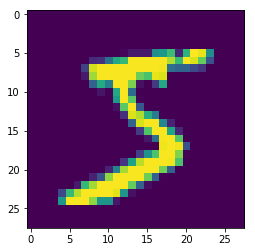

In [4]:
print (X_train.shape) # print shape of X_train dataset
from matplotlib import pyplot as plt # import pyplot alias plt for plotting 
#%matplotlib inline # print results in notebook cells
plt.imshow(X_train[0]) # display image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # reshape or arrange train dataset for all images with 1 channel 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)# reshape or arrange test dataset for all images with 1 channel

In [0]:
X_train = X_train.astype('float32') # set datatype of training dataset as float32
X_test = X_test.astype('float32')# set datatype of test dataset as float32
X_train /= 255 # normalize training dataset between 0 and 1
X_test /= 255 # normalize tes dataset between 0 and 1

In [7]:
y_train[:10] # training set labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)# convert train labels into one-hot encodings
Y_test = np_utils.to_categorical(y_test, 10)# convert test labels into one-hot encodings

In [9]:
Y_train[:10]# print first 10 train labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
##

## Mean and std deviation of batch and dataset

In [0]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

In [11]:

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())


Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) 0.018896434 1.0223974


In [12]:
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(60000, 28, 28, 1) -3.4560264e-07 0.9999998


# 1. Original Network with Image Normalization

In [25]:
from keras.layers import Activation, BatchNormalization, Dropout

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam

In [0]:
# set adam optimizer parameters
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True),
    ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1,factor=0.1, min_lr=0.00001 )
]

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_batches = datagen.flow(X_train, Y_train, batch_size=128)
val_batches = datagen.flow(X_test, Y_test,batch_size=128)



In [0]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [65]:
history = model.fit_generator(train_batches,steps_per_epoch=len(train_batches),
                    epochs=40,
                    verbose=1,
                    validation_data= val_batches,validation_steps = len(val_batches),  callbacks = callbacks_list,shuffle = False)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


469/469 [==============================] - 10s 22ms/step - loss: 0.1884 - acc: 0.9413 - val_loss: 0.0664 - val_acc: 0.9788

Epoch 00001: val_acc improved from -inf to 0.97880, saving model to best_mnist_cnn_model.h5
Epoch 2/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0608 - acc: 0.9810 - val_loss: 0.0425 - val_acc: 0.9870

Epoch 00002: val_acc improved from 0.97880 to 0.98700, saving model to best_mnist_cnn_model.h5
Epoch 3/40
469/469 [==============================] - 6s 13ms/step - loss: 0.0483 - acc: 0.9854 - val_loss: 0.0434 - val_acc: 0.9860

Epoch 00003: val_acc did not improve from 0.98700
Epoch 4/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0422 - acc: 0.9864 - val_loss: 0.0589 - val_acc: 0.9816

Epoch 00004: val_acc did not improve from 0.98700
Epoch 5/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0480 - val_acc: 0.9842

Epoch 00005: val_acc did not improve from 0.98700
Epo

# Visualization

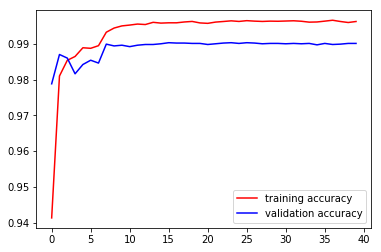

In [67]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

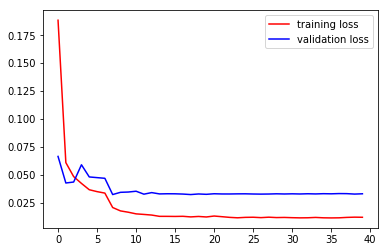

In [68]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [74]:
_, acc = model.evaluate_generator(val_batches, steps=len(val_batches), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Test Accuracy: 99.050


In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/'My Drive'

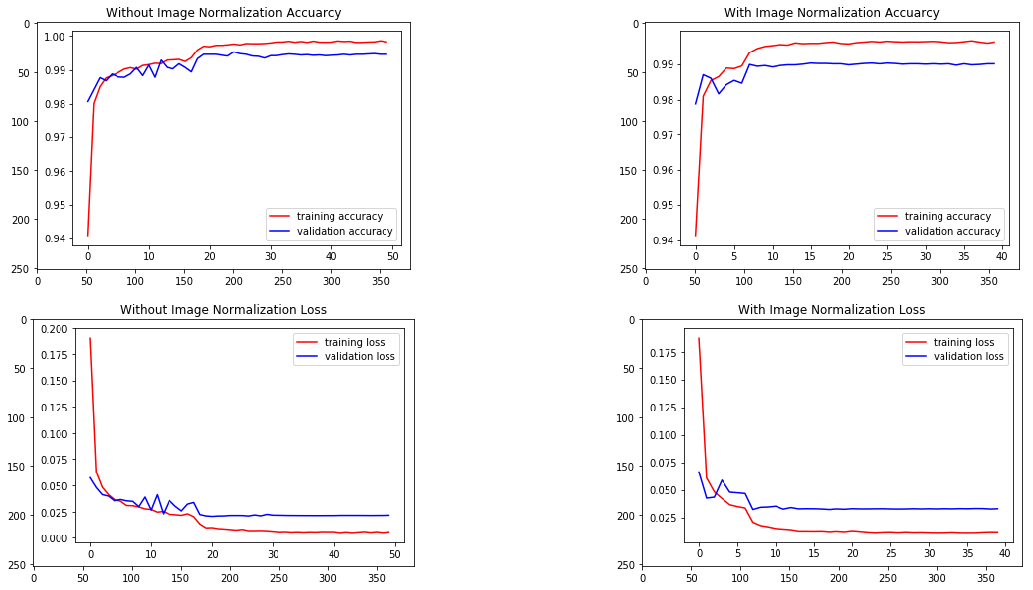

In [98]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
acc = plt.imread("/content/gdrive/My Drive/acc.png")
plt.title("Without Image Normalization Accuarcy")
plt.imshow(acc)


plt.subplot(2,2,2)
acc = plt.imread("/content/gdrive/My Drive/acc_mean_std.png")
plt.title("With Image Normalization Accuarcy")
plt.imshow(acc)

plt.subplot(2,2,3)
loss = plt.imread("/content/gdrive/My Drive/loss.png")
plt.title("Without Image Normalization Loss")
plt.imshow(loss)


plt.subplot(2,2,4)
loss = plt.imread("/content/gdrive/My Drive/loss_mean_std.png")
plt.title("With Image Normalization Loss")
plt.imshow(loss)

#  2. Original Network with  L2 regularization and BN before Relu

In [197]:
from keras.layers import Activation, BatchNormalization, Dropout
from keras import regularizers
weight_decay= 1e-6

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(weight_decay), input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(weight_decay)))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(weight_decay)))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 5, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg...)`


In [198]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_46 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_47 (Activation)   (None, 24, 24, 32)        0         
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam

In [0]:
# set adam optimizer parameters
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True),
    ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1,factor=0.1, min_lr=0.00001 )
]

In [0]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [205]:
# model training
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=40,validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 169us/step - loss: 0.1900 - acc: 0.9456 - val_loss: 0.0636 - val_acc: 0.9832

Epoch 00001: val_acc improved from -inf to 0.98320, saving model to best_mnist_cnn_model.h5
Epoch 2/40
60000/60000 [==============================] - 7s 109us/step - loss: 0.0535 - acc: 0.9832 - val_loss: 0.0431 - val_acc: 0.9870

Epoch 00002: val_acc improved from 0.98320 to 0.98700, saving model to best_mnist_cnn_model.h5
Epoch 3/40
60000/60000 [==============================] - 6s 101us/step - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0394 - val_acc: 0.9885

Epoch 00003: val_acc improved from 0.98700 to 0.98850, saving model to best_mnist_cnn_model.h5
Epoch 4/40
60000/60000 [==============================] - 6s 99us/step - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0314 - val_acc: 0.9904

Epoch 00004: val_acc improved from 0.98850 to 0.99040, saving model to best_mnist_cnn_model.h5
Epoch 5/40
60000/

# Visualization

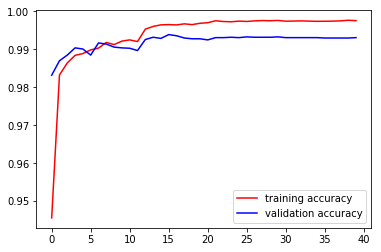

In [206]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

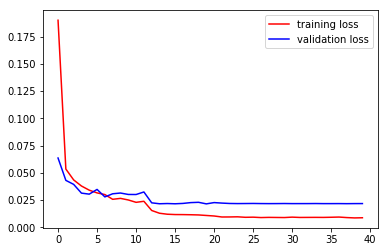

In [207]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [209]:
print(score)

[0.021777050404716284, 0.9931]


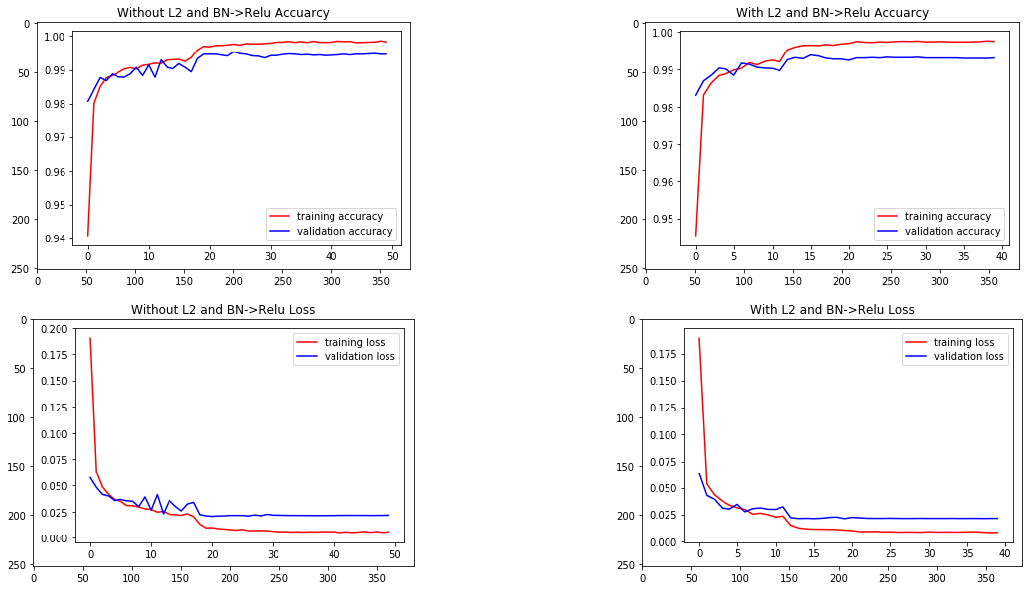

In [210]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
acc = plt.imread("/content/gdrive/My Drive/acc.png")
plt.title("Without L2 and BN->Relu Accuarcy")
plt.imshow(acc)


plt.subplot(2,2,2)
acc = plt.imread("/content/gdrive/My Drive/acc_l2_reg_bn_relu.png")
plt.title("With L2 and BN->Relu Accuarcy")
plt.imshow(acc)

plt.subplot(2,2,3)
loss = plt.imread("/content/gdrive/My Drive/loss.png")
plt.title("Without L2 and BN->Relu Loss")
plt.imshow(loss)


plt.subplot(2,2,4)
loss = plt.imread("/content/gdrive/My Drive/loss_l2_reg_bn_relu.png")
plt.title("With L2 and BN->Relu Loss")
plt.imshow(loss)

# 3. Original Network with Image Normalization, L2 regularization and BN before Relu

In [25]:
from keras.layers import Activation, BatchNormalization, Dropout
from keras import regularizers
weight_decay= 1e-6

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(weight_decay), input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(weight_decay)))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(weight_decay)))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 5, kernel_regularizer=regularizers.l2(weight_decay))) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg...)`


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam

In [0]:
# set adam optimizer parameters
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True),
    ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1,factor=0.1, min_lr=0.00001 )
]

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_batches = datagen.flow(X_train, Y_train, batch_size=128)
val_batches = datagen.flow(X_test, Y_test,batch_size=128)



In [0]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [33]:
history = model.fit_generator(train_batches,steps_per_epoch=len(train_batches),
                    epochs=40,
                    verbose=1,
                    validation_data= val_batches,validation_steps = len(val_batches),  callbacks = callbacks_list,shuffle = False)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


469/469 [==============================] - 8s 16ms/step - loss: 0.1862 - acc: 0.9469 - val_loss: 0.0482 - val_acc: 0.9851

Epoch 00001: val_acc improved from -inf to 0.98510, saving model to best_mnist_cnn_model.h5
Epoch 2/40
469/469 [==============================] - 7s 16ms/step - loss: 0.0522 - acc: 0.9842 - val_loss: 0.0495 - val_acc: 0.9850

Epoch 00002: val_acc did not improve from 0.98510
Epoch 3/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0412 - acc: 0.9872 - val_loss: 0.0406 - val_acc: 0.9870

Epoch 00003: val_acc improved from 0.98510 to 0.98700, saving model to best_mnist_cnn_model.h5
Epoch 4/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0352 - val_acc: 0.9889

Epoch 00004: val_acc improved from 0.98700 to 0.98890, saving model to best_mnist_cnn_model.h5
Epoch 5/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0335 - acc: 0.9893 - val_loss: 0.0448 - val_acc: 0.9870

Epoch 000

# Visualization

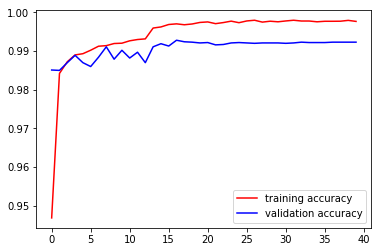

In [34]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

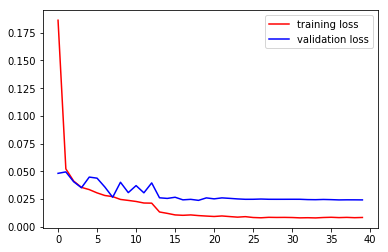

In [35]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02420515560172498, 0.9923]


In [38]:
_, acc = model.evaluate_generator(val_batches, steps=len(val_batches), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Test Accuracy: 99.230


### Save model best weights to google drive

In [39]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 5.0MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [41]:
model.save_weights('best_mnist_cnn_model.h5')
weights_file = drive.CreateFile({'title' : 'best_mnist_cnn_model.h5'})
weights_file.SetContentFile('best_mnist_cnn_model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '14HtbIq9V445RNLTVDGJ-1L-6a7d9fN7o'})

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/'My Drive'

In [0]:
#from keras.models import load_model
#model = load_model('/content/gdrive/My Drive/best_mnist_cnn_model.h5')

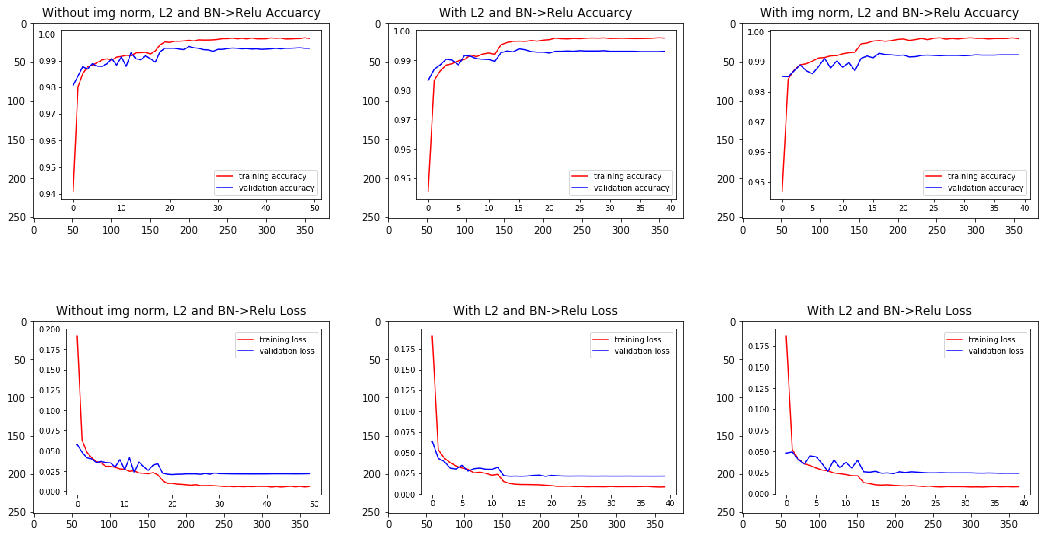

In [56]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
acc = plt.imread("/content/gdrive/My Drive/acc.png")
plt.title("Without img norm, L2 and BN->Relu Accuarcy")
plt.imshow(acc)


plt.subplot(2,3,2)
acc = plt.imread("/content/gdrive/My Drive/acc_l2_reg_bn_relu.png")
plt.title("With L2 and BN->Relu Accuarcy")
plt.imshow(acc)

plt.subplot(2,3,3)
acc = plt.imread("/content/gdrive/My Drive/acc_img_norm_l2_reg_bn_relu.png")
plt.title("With img norm, L2 and BN->Relu Accuarcy")
plt.imshow(acc)

plt.subplot(2,3,4)
loss = plt.imread("/content/gdrive/My Drive/loss.png")
plt.title("Without img norm, L2 and BN->Relu Loss")
plt.imshow(loss)


plt.subplot(2,3,5)
loss = plt.imread("/content/gdrive/My Drive/loss_l2_reg_bn_relu.png")
plt.title("With L2 and BN->Relu Loss")
plt.imshow(loss)

plt.subplot(2,3,6)
loss = plt.imread("/content/gdrive/My Drive/loss_img_norm_l2_reg_bn_relu.png")
plt.title("With L2 and BN->Relu Loss")
plt.imshow(loss)

## Prediction

In [0]:
y_pred = model.predict(X_test)

In [58]:
print(y_pred[:9])
print(y_test[:9])

[[4.4675402e-10 3.0101208e-07 9.5659152e-09 4.4971944e-08 5.3865595e-10
  2.2546502e-09 1.5648634e-13 9.9999785e-01 1.3674207e-09 1.7325038e-06]
 [4.4014338e-05 2.1276952e-04 9.9971706e-01 1.8127315e-07 1.4685786e-09
  1.1703460e-09 1.6906356e-06 1.6934200e-05 7.1937206e-06 2.6523391e-08]
 [5.8873608e-09 9.9998903e-01 9.9077706e-09 1.2626282e-10 4.9940782e-06
  6.4824303e-07 5.3913925e-07 4.6720706e-06 1.4591625e-07 6.5539596e-09]
 [9.9995065e-01 7.9804149e-11 4.3111018e-07 1.8670623e-09 2.6964928e-10
  1.1644644e-07 4.7822148e-05 1.8646752e-08 9.4574409e-07 4.3192316e-08]
 [1.4925099e-10 4.4891792e-08 8.2161755e-08 6.2520294e-11 9.9997258e-01
  2.6314498e-10 1.4991134e-06 7.9057116e-09 4.6407140e-06 2.1129814e-05]
 [2.3086111e-08 9.9995351e-01 5.0901381e-08 5.0758304e-11 2.6984904e-05
  1.4604375e-07 8.0437019e-08 1.8914974e-05 1.4295318e-07 1.7994552e-07]
 [1.9229325e-10 3.9777915e-06 6.3294600e-08 1.5610888e-11 9.9988961e-01
  1.2601397e-07 2.9776901e-09 1.0694897e-06 5.9778828e-05 

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

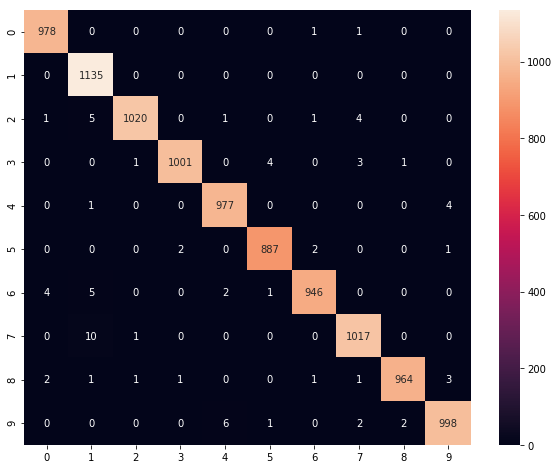

In [60]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [0]:
correct_indices = np.where(Y_pred_classes == Y_true)[0]

In [62]:
len(correct_indices)

9923

In [0]:
incorrect_indices = np.where(Y_pred_classes != Y_true)[0]

In [64]:
len(incorrect_indices)

77

In [77]:
incorrect_indices[0]

321

In [76]:
print(Y_pred_classes[incorrect_indices[0]], Y_true[incorrect_indices[0]])

7 2


In [78]:
Y_test[incorrect_indices[0]]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [65]:
incorrect_indices[:9]

array([321, 326, 449, 543, 625, 646, 659, 684, 689])

In [81]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
X_test1 = X_test.reshape(X_test.shape[0], 28, 28)

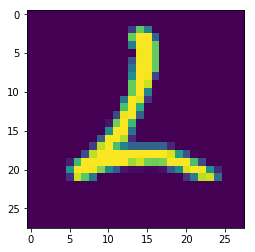

In [84]:
plt.imshow(X_test1[326])

In [73]:
print(y_train[326])

0


# Misclassified images plotting

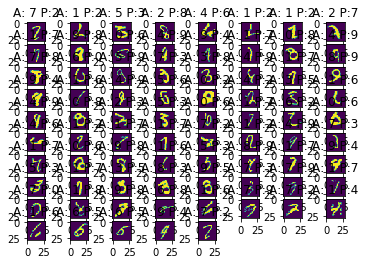

In [230]:
for i in range (77):#(len(incorrect_indices)):
  plt.subplot(10,8,i+1)
  plt.imshow(X_test1[incorrect_indices[i]])
  plt.title('A:%  d' ' P:%d' % (Y_pred_classes[incorrect_indices[i]], Y_true[incorrect_indices[i]]))

## Above images are not properly visible, we can plot in group of 6 images as follows

In [0]:
Y_pred_classes[incorrect_indices[0]], Y_true[incorrect_indices[0]]

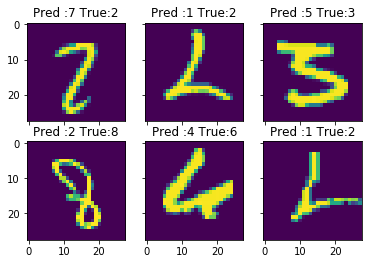

In [159]:
n = 0
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

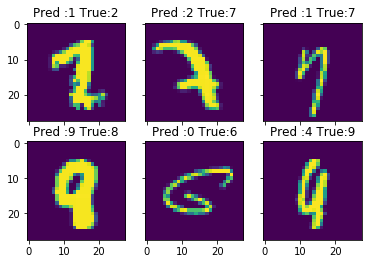

In [160]:
n = 6
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

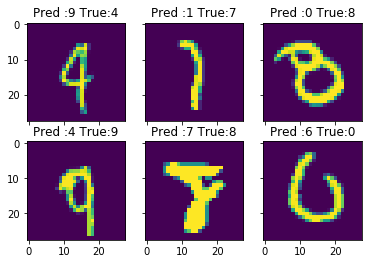

In [161]:
n = 12
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

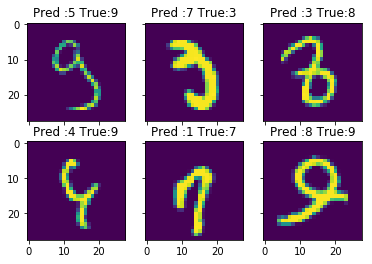

In [162]:
n = 18
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

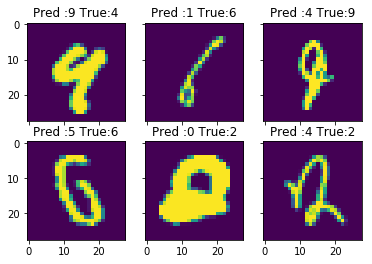

In [163]:
n = 24
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

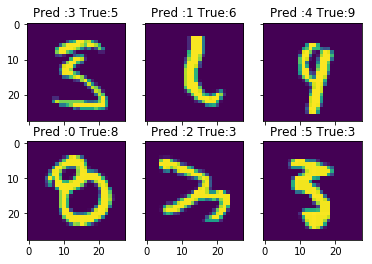

In [164]:
n = 30
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

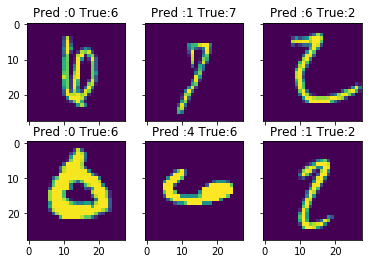

In [165]:
n = 36
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

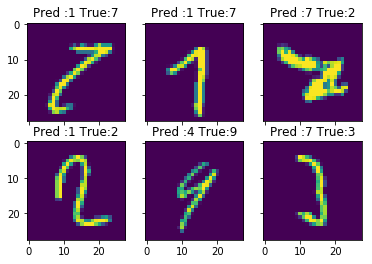

In [166]:
n = 42
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

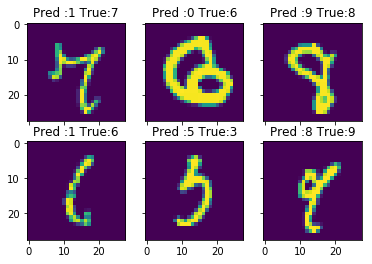

In [167]:
n = 48
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

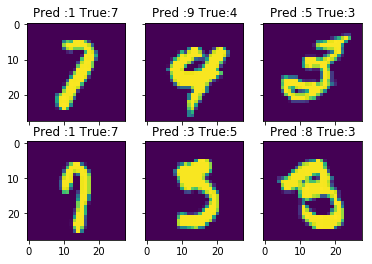

In [168]:
n = 54
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

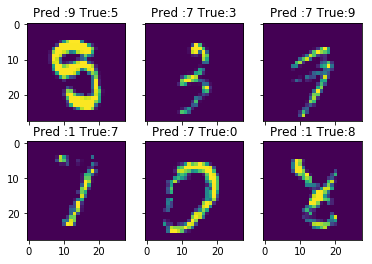

In [169]:
n = 60
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

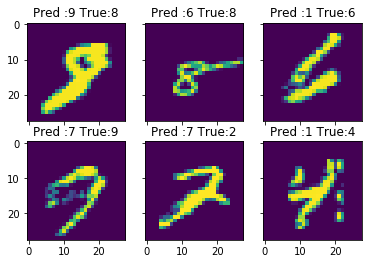

In [170]:
n = 66
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

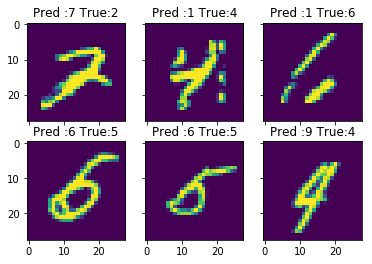

In [172]:
n = 70
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
     for col in range(ncols):
        #index1 = incorrect_indices[n]
        ax[row,col].imshow(X_test1[incorrect_indices[n]])
        ax[row,col].set_title("Pred :{} True:{}".format(Y_pred_classes[incorrect_indices[n]],Y_true[incorrect_indices[n]]))
        n += 1

## 25 out of 77 images and downloaded as push to github Misclassified images folder

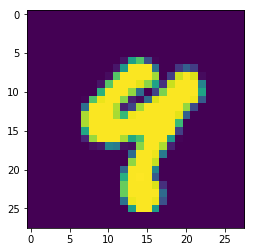

In [228]:
plt.imshow(X_test1[incorrect_indices[24]])


In [0]:
from google.colab import files

In [0]:
plt.imsave('1.jpg',X_test1[incorrect_indices[0]])
files.download('1.jpg')
